In [554]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [618]:
df = pd.read_csv('https://raw.githubusercontent.com/Rahulrex069/Datatrained-Projects/main/Evaluation%20Project%20Week1/avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [619]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

AS we can see, there is first column given which is indexing, it is not required. Also as we alreay have year colums seperately, we don't need date colunm, Hence I will drop these two columns before moving ahead.

In [620]:
df.drop(df.columns[0], axis=1,inplace=True)
df.drop(df.columns[0], axis=1,inplace=True)

In [621]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [622]:
df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [623]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(2)
memory usage: 1.7+ MB


No missing value in the given dataset.

<AxesSubplot:xlabel='year', ylabel='Total Volume'>

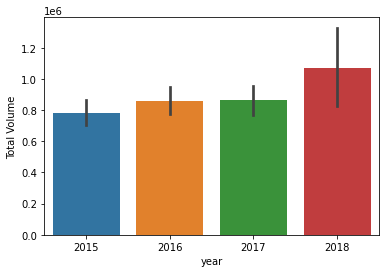

In [624]:
sns.barplot(x="year", y="Total Volume", data=df)

The total sales volume was highest in 2018. In 2017 and 2018 it remained almost identical. Year 2015 was the least in all years.

In [625]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


1. All the variable (except AveragePrice 4225) have a significant difference in the values of mean and median meaning they are either left skewed or right skewed.
2. Here also we can confirm that there are no missing value in the dataset.

In [626]:
import dtale
dtale.show(df)

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<AxesSubplot:xlabel='year', ylabel='Density'>

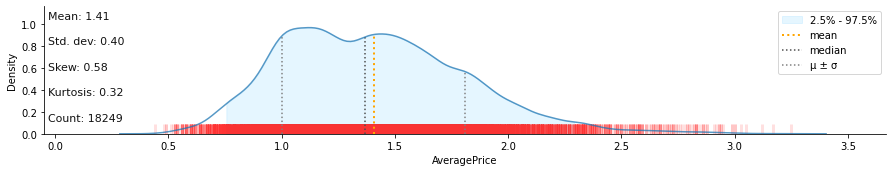

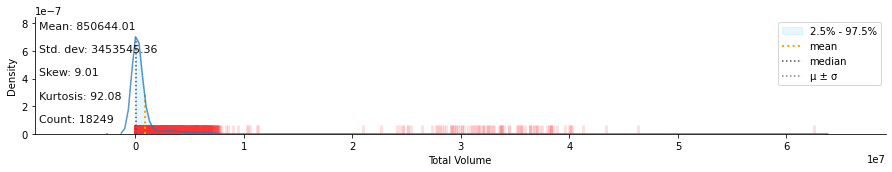

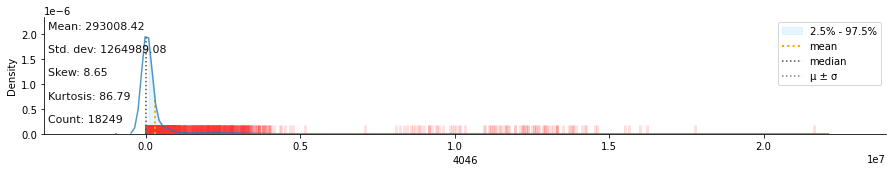

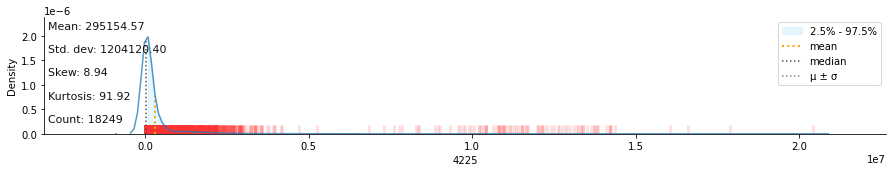

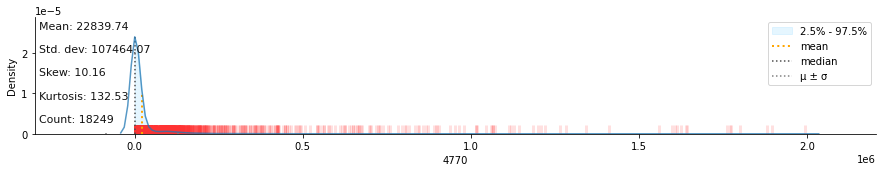

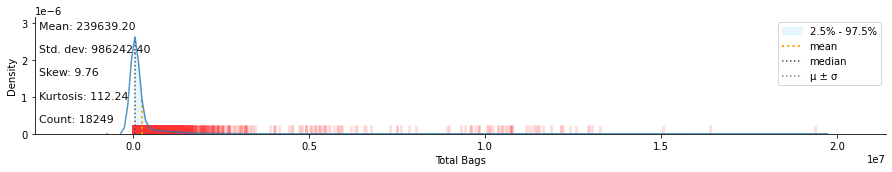

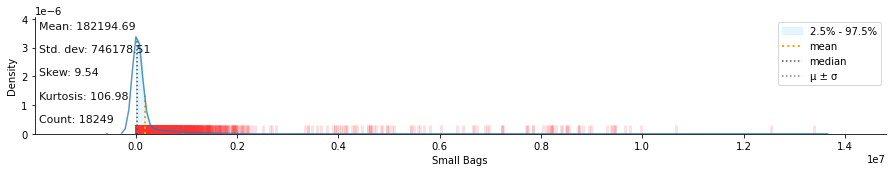

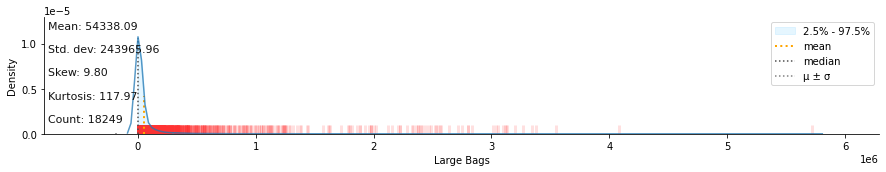

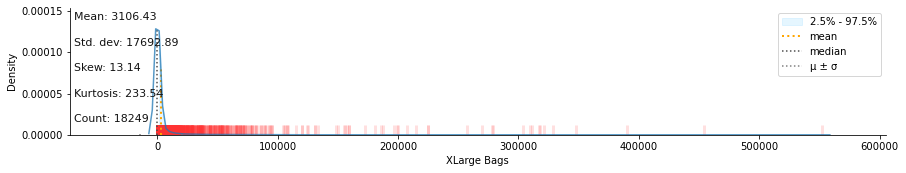

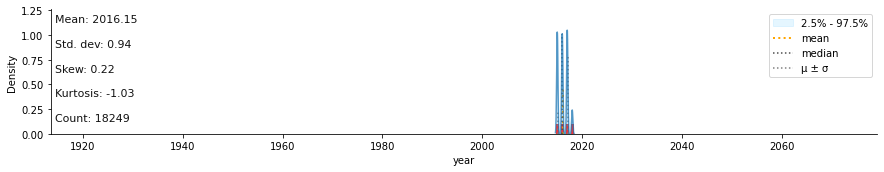

In [627]:
import klib
%matplotlib inline
klib.dist_plot(data=df)

<AxesSubplot:xlabel='AveragePrice', ylabel='region'>

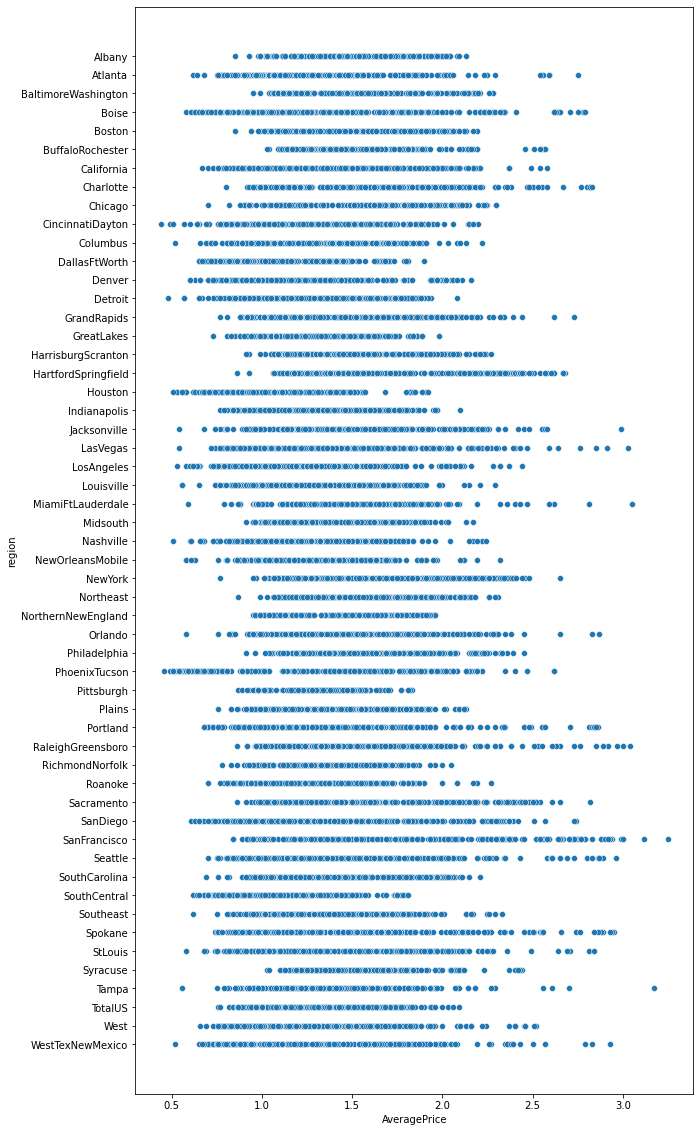

In [631]:
plt.figure(figsize=[10,20])
sns.scatterplot(x='AveragePrice' , y="region",data=df)

From the above distribution plots we can see that right skewed. Hence Let us find out the outliers and then if we can afford to remove them, we will get rid of them.

<AxesSubplot:>

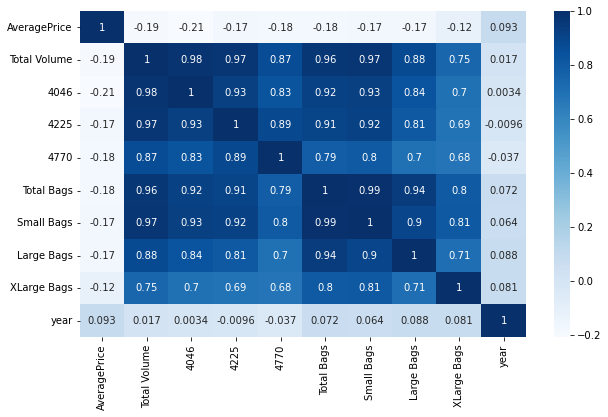

In [566]:
plt.figure(figsize=[10,6])
sns.heatmap(df.corr(), annot=True, cmap='Blues')

In [567]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

Total volume has extremely high correlation with most of the columns and total bags has high correlation with Small bags. These both columns also has the problem of skewness, hence to avoid problem of multicolinearity and skewness, i will drop that columns

In [568]:
df.drop(['Total Volume'], axis=1, inplace=True)
df.drop(['Small Bags'], axis=1, inplace=True)
df

,AveragePrice,4046,4225,4770,Total Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,1036.74,54454.85,48.16,8696.87,93.25,0.0,conventional,2015,Albany
1,1.35,674.28,44638.81,58.33,9505.56,97.49,0.0,conventional,2015,Albany
2,0.93,794.70,109149.67,130.50,8145.35,103.14,0.0,conventional,2015,Albany
3,1.08,1132.00,71976.41,72.58,5811.16,133.76,0.0,conventional,2015,Albany
4,1.28,941.48,43838.39,75.78,6183.95,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...
18244,1.63,2046.96,1529.20,0.00,13498.67,431.85,0.0,organic,2018,WestTexNewMexico
18245,1.71,1191.70,3431.50,0.00,9264.84,324.80,0.0,organic,2018,WestTexNewMexico
18246,1.87,1191.92,2452.79,727.94,9394.11,42.31,0.0,organic,2018,WestTexNewMexico
18247,1.93,1527.63,2981.04,727.01,10969.54,50.00,0.0,organic,2018,WestTexNewMexico


<AxesSubplot:>

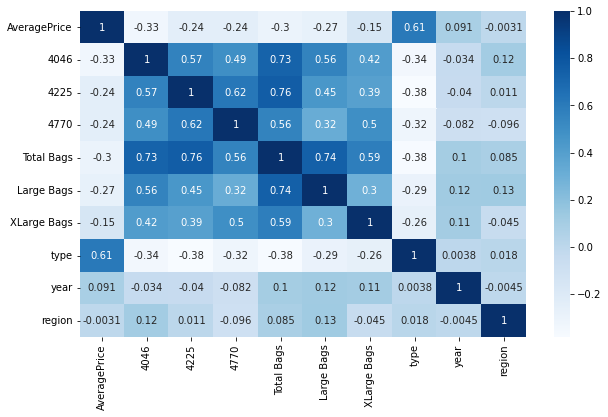

In [569]:
plt.figure(figsize=[10,6])
sns.heatmap(df_new.corr(), annot=True, cmap='Blues')

In [570]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
df['type'] = LE.fit_transform(df['type'])
df['region'] = LE.fit_transform(df['region'])
df

,AveragePrice,4046,4225,4770,Total Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,1036.74,54454.85,48.16,8696.87,93.25,0.0,0,2015,0
1,1.35,674.28,44638.81,58.33,9505.56,97.49,0.0,0,2015,0
2,0.93,794.70,109149.67,130.50,8145.35,103.14,0.0,0,2015,0
3,1.08,1132.00,71976.41,72.58,5811.16,133.76,0.0,0,2015,0
4,1.28,941.48,43838.39,75.78,6183.95,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...
18244,1.63,2046.96,1529.20,0.00,13498.67,431.85,0.0,1,2018,53
18245,1.71,1191.70,3431.50,0.00,9264.84,324.80,0.0,1,2018,53
18246,1.87,1191.92,2452.79,727.94,9394.11,42.31,0.0,1,2018,53
18247,1.93,1527.63,2981.04,727.01,10969.54,50.00,0.0,1,2018,53


In [571]:
from scipy.stats import zscore
z=np.abs(zscore(df))

threshold=3
print(np.where(z>3))

df_new=df[(z<3).all(axis=1)]
df_new

(array([  346,   359,   780, ..., 17304, 17402, 17428]), array([1, 1, 6, ..., 0, 0, 0]))


,AveragePrice,4046,4225,4770,Total Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,1036.74,54454.85,48.16,8696.87,93.25,0.0,0,2015,0
1,1.35,674.28,44638.81,58.33,9505.56,97.49,0.0,0,2015,0
2,0.93,794.70,109149.67,130.50,8145.35,103.14,0.0,0,2015,0
3,1.08,1132.00,71976.41,72.58,5811.16,133.76,0.0,0,2015,0
4,1.28,941.48,43838.39,75.78,6183.95,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...
18244,1.63,2046.96,1529.20,0.00,13498.67,431.85,0.0,1,2018,53
18245,1.71,1191.70,3431.50,0.00,9264.84,324.80,0.0,1,2018,53
18246,1.87,1191.92,2452.79,727.94,9394.11,42.31,0.0,1,2018,53
18247,1.93,1527.63,2981.04,727.01,10969.54,50.00,0.0,1,2018,53


After removing outliers we care loosing 3% of total data which is acceptable, hence i will continue with the new dataset whict is free from outliers.

In [572]:
X = df_new.iloc[:,:-1]
X

,AveragePrice,4046,4225,4770,Total Bags,Large Bags,XLarge Bags,type,year
0,1.33,1036.74,54454.85,48.16,8696.87,93.25,0.0,0,2015
1,1.35,674.28,44638.81,58.33,9505.56,97.49,0.0,0,2015
2,0.93,794.70,109149.67,130.50,8145.35,103.14,0.0,0,2015
3,1.08,1132.00,71976.41,72.58,5811.16,133.76,0.0,0,2015
4,1.28,941.48,43838.39,75.78,6183.95,197.69,0.0,0,2015
...,...,...,...,...,...,...,...,...,...
18244,1.63,2046.96,1529.20,0.00,13498.67,431.85,0.0,1,2018
18245,1.71,1191.70,3431.50,0.00,9264.84,324.80,0.0,1,2018
18246,1.87,1191.92,2452.79,727.94,9394.11,42.31,0.0,1,2018
18247,1.93,1527.63,2981.04,727.01,10969.54,50.00,0.0,1,2018


In [573]:
X.skew()

AveragePrice    0.376942
4046            4.903567
4225            4.451589
4770            5.111504
Total Bags      4.089312
Large Bags      5.053647
XLarge Bags     6.127601
type           -0.037510
year            0.229732
dtype: float64

Removing outliers has resulted in reducing the skewness upto some extent, but the data is still skewed hance i will use power transform to reduce the skewness further.

In [633]:
from sklearn.preprocessing import power_transform
data = power_transform(df_new, method = "yeo-johnson")
data

array([[-0.11768671, -0.65748818,  0.35119234, ..., -1.01892949,
        -1.21076129, -2.01062889],
       [-0.06420752, -0.77723494,  0.26929166, ..., -1.01892949,
        -1.21076129, -2.01062889],
       [-1.29815712, -0.73183666,  0.64903154, ..., -1.01892949,
        -1.21076129, -2.01062889],
       ...,
       [ 1.18434277, -0.61803808, -0.77896172, ...,  0.98142218,
         1.97863072,  1.57831989],
       [ 1.31333288, -0.54709044, -0.71644563, ...,  0.98142218,
         1.97863072,  1.57831989],
       [ 0.61562376, -0.35977488, -0.79171745, ...,  0.98142218,
         1.97863072,  1.57831989]])

In [575]:
 data.shape

(17653, 10)

In [576]:
x = pd.DataFrame(data)
x

,0,1,2,3,4,5,6,7,8,9
0,-0.117687,-0.657488,0.351192,-0.222754,-0.537475,-0.781264,-0.678026,-1.018929,-1.210761,-2.010629
1,-0.064208,-0.777235,0.269292,-0.175416,-0.498101,-0.771310,-0.678026,-1.018929,-1.210761,-2.010629
2,-1.298157,-0.731837,0.649032,0.023710,-0.566333,-0.758635,-0.678026,-1.018929,-1.210761,-2.010629
3,-0.828597,-0.632662,0.468537,-0.121363,-0.713020,-0.699236,-0.678026,-1.018929,-1.210761,-2.010629
4,-0.253454,-0.684569,0.261906,-0.110690,-0.686265,-0.607142,-0.678026,-1.018929,-1.210761,-2.010629
...,...,...,...,...,...,...,...,...,...,...
17648,0.639414,-0.462156,-0.926085,-1.229040,-0.340423,-0.412517,-0.678026,0.981422,1.978631,1.578320
17649,0.826485,-0.618090,-0.670679,-1.229040,-0.509485,-0.485106,-0.678026,0.981422,1.978631,1.578320
17650,1.184343,-0.618038,-0.778962,0.445461,-0.503338,-0.950848,-0.678026,0.981422,1.978631,1.578320
17651,1.313333,-0.547090,-0.716446,0.445150,-0.434159,-0.916175,-0.678026,0.981422,1.978631,1.578320


In [577]:
x.skew()

0    0.000414
1   -0.039244
2   -0.044655
3    0.024146
4   -0.022071
5   -0.110932
6    0.853456
7   -0.037510
8    0.227483
9   -0.257751
dtype: float64

In [578]:
y = df_new.iloc[:,-1:]
y

,region
0,0
1,0
2,0
3,0
4,0
...,...
18244,53
18245,53
18246,53
18247,53


In [579]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [580]:
x = sc.fit_transform(x)
x

array([[-0.11768671, -0.65748818,  0.35119234, ..., -1.01892949,
        -1.21073637, -2.01062889],
       [-0.06420752, -0.77723494,  0.26929166, ..., -1.01892949,
        -1.21073637, -2.01062889],
       [-1.29815712, -0.73183666,  0.64903154, ..., -1.01892949,
        -1.21073637, -2.01062889],
       ...,
       [ 1.18434277, -0.61803808, -0.77896172, ...,  0.98142218,
         1.97865564,  1.57831989],
       [ 1.31333288, -0.54709044, -0.71644563, ...,  0.98142218,
         1.97865564,  1.57831989],
       [ 0.61562376, -0.35977488, -0.79171745, ...,  0.98142218,
         1.97865564,  1.57831989]])

In [581]:
x.shape

(17653, 10)

In [582]:
maxscore=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=i)
    mod = DecisionTreeClassifier()
    mod.fit(x_train,y_train)
    pred = mod.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxscore:
        maxscore=acc
        maxRS=i
print("Best accuracy score is ", maxscore, 'on Random state ', maxRS)

Best accuracy score is  1.0 on Random state  1


With this code I come to know that the best accuracy we can achieve with the Decision Classifier is 100% and the random state which is ideal for train and test split is 1. Hence now I will use rondom state as 1 for train test split.

In [583]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=1)

In [584]:
x_train.shape

(12357, 10)

In [585]:
y_train.shape

(12357, 1)

In [586]:
x_test.shape

(5296, 10)

In [587]:
x_train.shape

(12357, 10)

In [588]:
model=[DecisionTreeClassifier(),SVC(),KNeighborsClassifier(), RandomForestClassifier()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    m_pred=m.predict(x_test)
    print('accuracy_score of',m,"is:")
    print(accuracy_score(y_test,m_pred))
    print(confusion_matrix(y_test,m_pred))
    print(classification_report(y_test,m_pred))
    print("\n")

accuracy_score of DecisionTreeClassifier() is:
1.0
[[ 92   0   0 ...   0   0   0]
 [  0 110   0 ...   0   0   0]
 [  0   0 120 ...   0   0   0]
 ...
 [  0   0   0 ...  49   0   0]
 [  0   0   0 ...   0  72   0]
 [  0   0   0 ...   0   0 109]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       1.00      1.00      1.00       110
           2       1.00      1.00      1.00       120
           3       1.00      1.00      1.00        93
           4       1.00      1.00      1.00       111
           5       1.00      1.00      1.00       113
           6       1.00      1.00      1.00        93
           7       1.00      1.00      1.00        99
           8       1.00      1.00      1.00        99
           9       1.00      1.00      1.00        98
          10       1.00      1.00      1.00       113
          11       1.00      1.00      1.00       106
          12       1.00      1.00      1.00       106


accuracy_score of RandomForestClassifier() is:
0.9966012084592145
[[ 92   0   0 ...   0   0   0]
 [  0 110   0 ...   0   0   0]
 [  0   0 120 ...   0   0   0]
 ...
 [  0   0   0 ...  49   0   0]
 [  0   0   0 ...   0  72   0]
 [  0   0   0 ...   0   0 109]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       1.00      1.00      1.00       110
           2       1.00      1.00      1.00       120
           3       1.00      1.00      1.00        93
           4       1.00      1.00      1.00       111
           5       1.00      1.00      1.00       113
           6       1.00      1.00      1.00        93
           7       1.00      1.00      1.00        99
           8       1.00      1.00      1.00        99
           9       1.00      1.00      1.00        98
          10       1.00      1.00      1.00       113
          11       1.00      1.00      1.00       106
          12       1.00      0.99      

In [589]:
print(cross_val_score(DecisionTreeClassifier(),x,y,cv=10).mean())

1.0


In [590]:
print(cross_val_score(SVC(),x,y,cv=10).mean())

0.9239721975367262


In [591]:
print(cross_val_score(KNeighborsClassifier(),x,y,cv=10).mean())

0.7813866262002765


In [592]:
print(cross_val_score(RandomForestClassifier(),x,y,cv=10).mean())

0.9914454008514625


When i checked the accuracy score with CV score, DecisionTreeClassifier and RandomForestClassifier has the least differance but which is 0% and 1% respectively. I checked confusion matrix also, and then i chose DecisionTreeClassifier as the best model to go with. Now I will check which parameters are best to use with the model with the help of hyperparameter tuning.

In [593]:
parameter = {'criterion' : ['gini', 'entropy'],
            'min_samples_leaf' : np.arange(1,20),
            'max_depth': np.arange(1,20),
            'splitter':['best', 'random']}

In [594]:
#GSV = GridSearchCV(DecisionTreeClassifier(),parameter,cv=5)
#GSV.fit(x_train,y_train)

In [595]:
#GSV.best_params_

In [596]:
Final_model=DecisionTreeClassifier(criterion='gini', max_depth=11, min_samples_leaf=4, splitter= 'random')
Final_model.fit(x_train,y_train)
Final_model.score(x_train,y_train)
pred=Final_model.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

92.35271903323263
[[ 92   0   0 ...   0   0   0]
 [  0 110   0 ...   0   0   0]
 [  0   0 120 ...   0   0   0]
 ...
 [  0   0   0 ...  49   0   0]
 [  0   0   0 ...   0  72   0]
 [  0   0   0 ...   0   0 109]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       1.00      1.00      1.00       110
           2       1.00      1.00      1.00       120
           3       1.00      1.00      1.00        93
           4       1.00      1.00      1.00       111
           5       1.00      1.00      1.00       113
           6       1.00      1.00      1.00        93
           7       1.00      1.00      1.00        99
           8       1.00      1.00      1.00        99
           9       1.00      1.00      1.00        98
          10       1.00      1.00      1.00       113
          11       1.00      1.00      1.00       106
          12       1.00      1.00      1.00       106
          13       1.00      1.00

As thsese is multiclass classification, i can not Plot the AUC ROC curve.

# Regression Problem

In [610]:
df_new

,AveragePrice,4046,4225,4770,Total Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,1036.74,54454.85,48.16,8696.87,93.25,0.0,0,2015,0
1,1.35,674.28,44638.81,58.33,9505.56,97.49,0.0,0,2015,0
2,0.93,794.70,109149.67,130.50,8145.35,103.14,0.0,0,2015,0
3,1.08,1132.00,71976.41,72.58,5811.16,133.76,0.0,0,2015,0
4,1.28,941.48,43838.39,75.78,6183.95,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...
18244,1.63,2046.96,1529.20,0.00,13498.67,431.85,0.0,1,2018,53
18245,1.71,1191.70,3431.50,0.00,9264.84,324.80,0.0,1,2018,53
18246,1.87,1191.92,2452.79,727.94,9394.11,42.31,0.0,1,2018,53
18247,1.93,1527.63,2981.04,727.01,10969.54,50.00,0.0,1,2018,53


In [598]:
M = df_new.drop(['AveragePrice'], axis=1)
M

,4046,4225,4770,Total Bags,Large Bags,XLarge Bags,type,year,region
0,1036.74,54454.85,48.16,8696.87,93.25,0.0,0,2015,0
1,674.28,44638.81,58.33,9505.56,97.49,0.0,0,2015,0
2,794.70,109149.67,130.50,8145.35,103.14,0.0,0,2015,0
3,1132.00,71976.41,72.58,5811.16,133.76,0.0,0,2015,0
4,941.48,43838.39,75.78,6183.95,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...
18244,2046.96,1529.20,0.00,13498.67,431.85,0.0,1,2018,53
18245,1191.70,3431.50,0.00,9264.84,324.80,0.0,1,2018,53
18246,1191.92,2452.79,727.94,9394.11,42.31,0.0,1,2018,53
18247,1527.63,2981.04,727.01,10969.54,50.00,0.0,1,2018,53


In [634]:
data2 = power_transform(M, method = "yeo-johnson")
data2

array([[-0.65748818,  0.35119234, -0.22275418, ..., -1.01892949,
        -1.21076129, -2.01062889],
       [-0.77723494,  0.26929166, -0.17541644, ..., -1.01892949,
        -1.21076129, -2.01062889],
       [-0.73183666,  0.64903154,  0.02370957, ..., -1.01892949,
        -1.21076129, -2.01062889],
       ...,
       [-0.61803808, -0.77896172,  0.44546112, ...,  0.98142218,
         1.97863072,  1.57831989],
       [-0.54709044, -0.71644563,  0.44515011, ...,  0.98142218,
         1.97863072,  1.57831989],
       [-0.35977488, -0.79171745,  0.15754187, ...,  0.98142218,
         1.97863072,  1.57831989]])

In [635]:
x = sc.fit_transform(data2)
x

array([[-0.65748818,  0.35119234, -0.22275418, ..., -1.01892949,
        -1.21073637, -2.01062889],
       [-0.77723494,  0.26929166, -0.17541644, ..., -1.01892949,
        -1.21073637, -2.01062889],
       [-0.73183666,  0.64903154,  0.02370957, ..., -1.01892949,
        -1.21073637, -2.01062889],
       ...,
       [-0.61803808, -0.77896172,  0.44546112, ...,  0.98142218,
         1.97865564,  1.57831989],
       [-0.54709044, -0.71644563,  0.44515011, ...,  0.98142218,
         1.97865564,  1.57831989],
       [-0.35977488, -0.79171745,  0.15754187, ...,  0.98142218,
         1.97865564,  1.57831989]])

In [600]:
y = df_new.iloc[:,:1]
y

,AveragePrice
0,1.33
1,1.35
2,0.93
3,1.08
4,1.28
...,...
18244,1.63
18245,1.71
18246,1.87
18247,1.93


In [601]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [636]:
from sklearn.metrics import r2_score

maxscore=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=i)
    mod = LinearRegression()
    mod.fit(x_train,y_train)
    pred = mod.predict(x_test)
    r2score = r2_score(y_test,pred)
    if r2score>maxscore:
        maxscore=r2score
        maxRS=i
print("Best r2 score is ", maxscore, 'on Random state ', maxRS)

Best r2 score is  0.5165395626644054 on Random state  147


In [637]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=147)

In [638]:
x_test.shape

(5296, 9)

In [639]:
y_test.shape

(5296, 1)

In [640]:
x_train.shape

(12357, 9)

In [641]:
y_train.shape

(12357, 1)

In [642]:
model=[LinearRegression(),KNeighborsRegressor(), DecisionTreeRegressor(), SVR(), RandomForestRegressor()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    m_pred=m.predict(x_test)
    r2sscore = r2_score(y_test,m_pred)
    MSE= mean_squared_error(y_test,m_pred)
    
    print(m)
    print(m.score(x_train,y_train))
    print('R2 score for :', m, 'is', r2sscore)
    print('Mean Squared Error for ',m ,"is:" ,MSE)
    print("\n")

LinearRegression()
0.48571911098660325
R2 score for : LinearRegression() is 0.5165395626644054
Mean Squared Error for  LinearRegression() is: 0.07413502701373473


KNeighborsRegressor()
0.8886521370944797
R2 score for : KNeighborsRegressor() is 0.8145041329544906
Mean Squared Error for  KNeighborsRegressor() is: 0.02844439803625378


DecisionTreeRegressor()
1.0
R2 score for : DecisionTreeRegressor() is 0.6587583086764368
Mean Squared Error for  DecisionTreeRegressor() is: 0.0523268504531722


SVR()
0.7196209650404043
R2 score for : SVR() is 0.7153462223247333
Mean Squared Error for  SVR() is: 0.04364951890131394


RandomForestRegressor()
0.9771951030102294
R2 score for : RandomForestRegressor() is 0.8326330620766536
Mean Squared Error for  RandomForestRegressor() is: 0.025664462913519637




In [643]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
for i in model:
    kfold=KFold(5)
    score=cross_val_score(i,x,y,cv=kfold)
    print(i, "CV Score is ",score.mean())

LinearRegression() CV Score is  0.08766371039781799
KNeighborsRegressor() CV Score is  0.08592452776693327
DecisionTreeRegressor() CV Score is  -0.3483933498270863
SVR() CV Score is  0.0015995964254096108
RandomForestRegressor() CV Score is  0.2599793494067578


When i checked the accuracy score with CV score, DecisionTree Regressor has the least differance. Now I will check which parameters are best to use with the model with the help of hyperparameter tuning.

In [644]:
parameter = {'criterion' : ["squared_error", "mse", "friedman_mse", "absolute_error", "mae", "poisson"],
            'min_samples_leaf' : np.arange(1,20),
            'max_depth': np.arange(1,20),
            'splitter':['best', 'random']}

In [ ]:
#GSV2 = GridSearchCV(DecisionTreeRegressor(),parameter,cv=5)
#GSV2.fit(x_train,y_train)

In [647]:
#GSV2.best_params_

{'criterion': 'mse',
 'max_depth': 15,
 'min_samples_leaf': 8,
 'splitter': 'best'}

In [652]:
Final_Model = DecisionTreeRegressor(criterion= 'mse', max_depth= 15, min_samples_leaf= 8, splitter= 'best')
Final_Model.fit(x_train,y_train)
Final_Model.score(x_train,y_train)
model_pred=Final_Model.predict(x_test)
r2score = r2_score(y_test,model_pred)
MSE= mean_squared_error(y_test,model_pred)

print(Final_Model.score(x_train,y_train))
print('R2 score is :',r2score)
print('Mean Squared Error is ',MSE) 

0.8644896404613325
R2 score is : 0.7117197229125842
Mean Squared Error is  0.04420561534917765


With the Hyperparameter tuning we improved R2 score to 0.71. 

In [653]:
import joblib
joblib.dump(Final_Model,'avocado.ipynb.obj')

['avocado.ipynb.obj']